# <div align = center>NBA Statistical Analysis and Prediction Using Decision Tree</div>

<div align = center><img src = "https://cdn.nba.net/nba-drupal-prod/2017-08/SEO-image-NBA-logoman.jpg"></div>

In [1]:
import os
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
salary_table = pd.read_csv("NBA_season1718_salary.csv",encoding = 'utf-8') 
seasons = pd.read_csv("Seasons_Stats.csv",encoding = 'utf-8')  

In [3]:
salary_table.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [4]:
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [5]:
seasons[seasons['Year']==2017] 

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24097,24097,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
24098,24098,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
24099,24099,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
24100,24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [6]:
salary_table = salary_table[['Player','season17_18']] # hapus column team
salary_table.rename(columns={'season17_18':'salary17_18'},inplace = True) # rename
salary_table['salary17_18'] = salary_table['salary17_18']/1000000 # ubah jumlah ke juta usd

seasons = seasons[seasons['Year']==2017] # ambil hanya data season 2017-2018
stats17 = seasons[['Year','Player','Pos','Age','G','PER', # pisahin sehingga hanya data ini aja yang diambil
                   'MP','PTS','AST','TRB','TOV','BLK','STL']]

stats17.drop_duplicates(subset=['Player'], keep='first',inplace=True) # hapus data pemain duplicate, keep yang pertama

c = ['MPG','PPG','APG','RPG','TOPG','BPG','SPG']
w = ['MP','PTS','AST','TRB','TOV','BLK','STL'] 

for i,s in zip(c,w):
    stats17[i] = stats17[s] / stats17['G']

stats17.drop(w,axis=1,inplace=True)
#stats17.drop(['G'],axis=1,inplace=True)
stats17.loc[stats17['Pos'] == 'PF-C','Pos'] = 'PF'
stats_salary = pd.merge(stats17, salary_table) 


Berikut merupakan variable yang saya ambil dari dataset season_stats.csv


Variable | Meaning
------------- | -------------
Pos | Position
MPG | Average Minutes played Per Game
PPG | Average Points Per Game
APG | Average Assists Per Game
RPG | Average Rebounds Per Game
TOPG | Average Turnovers Per Game
BPG | Average Blocks Per Game
SPG | Average Steals Per Game
PER | Player Efficiency Rating
G | Games Attended
AGE | Age
salary17_18 | 2017-2018 Salary (million usd)

In [7]:
stats_salary

,Year,Player,Pos,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,salary17_18
0,2017.0,Alex Abrines,SG,23.0,68.0,10.1,15.514706,5.970588,0.588235,1.264706,0.485294,0.117647,0.544118,5.725000
1,2017.0,Quincy Acy,PF,26.0,38.0,11.8,14.684211,5.842105,0.473684,3.026316,0.552632,0.394737,0.368421,1.709538
2,2017.0,Steven Adams,C,23.0,80.0,16.5,29.862500,11.312500,1.075000,7.687500,1.825000,0.975000,1.100000,22.471910
3,2017.0,Arron Afflalo,SG,31.0,61.0,9.0,25.901639,8.442623,1.278689,2.049180,0.688525,0.114754,0.344262,2.328652
4,2017.0,Arron Afflalo,SG,31.0,61.0,9.0,25.901639,8.442623,1.278689,2.049180,0.688525,0.114754,0.344262,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2017.0,Cody Zeller,PF,24.0,62.0,16.7,27.822581,10.306452,1.596774,6.532258,1.048387,0.935484,1.000000,12.584270
438,2017.0,Tyler Zeller,C,27.0,51.0,13.0,10.294118,3.490196,0.823529,2.431373,0.392157,0.411765,0.137255,1.709538
439,2017.0,Stephen Zimmerman,C,20.0,19.0,7.3,5.684211,1.210526,0.210526,1.842105,0.157895,0.263158,0.105263,1.312611
440,2017.0,Paul Zipser,SF,22.0,44.0,6.9,19.159091,5.454545,0.818182,2.840909,0.909091,0.363636,0.340909,1.312611


In [8]:
stats_salary.drop_duplicates(subset = ["Player"], keep = "first", inplace = True)
stats_salary.sort_values(by = "PPG", ascending = False, inplace = True)
stats_salary[["Player", "PPG"]].head(10)

# disini points per game tertinggi dipegang oleh Russell Westbrook dan diikuti oleh James Harden.

,Player,PPG
418,Russell Westbrook,31.580247
164,James Harden,29.086420
384,Isaiah Thomas,28.934211
97,Anthony Davis,27.986667
105,DeMar DeRozan,27.297297
248,Damian Lillard,26.986667
86,DeMarcus Cousins,26.972222
204,LeBron James,26.405405
241,Kawhi Leonard,25.513514
95,Stephen Curry,25.303797


In [9]:
# Player Efficiency Rating Ranking

stats_salary.sort_values(by = "PER", ascending = False, inplace = True)
stats_salary[["Player", "PER"]].head(10)

,Player,PER
200,Demetrius Jackson,30.8
418,Russell Westbrook,30.6
261,Boban Marjanovic,29.6
114,Kevin Durant,27.6
97,Anthony Davis,27.5
241,Kawhi Leonard,27.5
164,James Harden,27.3
204,LeBron James,27.0
384,Isaiah Thomas,26.5
218,Nikola Jokic,26.4


In [10]:
stats_salary.sort_values(by='Age',ascending = False,inplace = True)
stats_salary[['Player','Age']].head(10)

,Player,Age
70,Vince Carter,40.0
147,Manu Ginobili,39.0
383,Jason Terry,39.0
325,Paul Pierce,39.0
303,Dirk Nowitzki,38.0
172,Udonis Haslem,36.0
112,Mike Dunleavy,36.0
89,Jamal Crawford,36.0
206,Richard Jefferson,36.0
26,Matt Barnes,36.0


In [11]:
stats_salary.sort_values(by='TOPG',ascending=False,inplace = True)
stats_salary[['Player','TOPG']].head(10)

,Player,TOPG
164,James Harden,5.728395
418,Russell Westbrook,5.407407
410,John Wall,4.141026
204,LeBron James,4.094595
121,Joel Embiid,3.774194
86,DeMarcus Cousins,3.736111
44,Eric Bledsoe,3.378788
359,Dennis Schroder,3.265823
49,Devin Booker,3.089744
95,Stephen Curry,3.025316


#### Turnovers

Turnover merupakan situasi dimana seorang pemain bertanggung jawab melepaskan possession atas bola ke tim musuh. Ini merupakan statistik negatif, dan setiap pemain berusaha untuk menguranginya.

Disini bisa dilihat bahwa pemain-pemain yang memiliki turnovers per game tertinggi merupakan pemain-pemain yang memegang bola paling sering (usage rate tertinggi). Di dataset ini tidak ada statistik usage rate (menunjukan seberapa involved seorang pemain di sebuah game), tapi pada tahun 2017 James Harden dan Russell Westbrook mencetak salah satu usage rate tertinggi dalam sejarah NBA.

Bisa dilihat juga bahwa hampir semua dari top 10 pemain dengan TOPG tertinggi berada di posisi guard, sehingga kebanyakan waktu mereka yang bertugas menjadi primary ball handler. Kasus LeBron merupakan hal yang unik karena walaupun pada 2017 dia masih di list di posisi small forward, tapi dia biasanya menjadi primary ball handler, banyak orang di media yang memberikan hal seperti ini nickname point forward. 

Pada kasus Joel Embiid dan DeMarcus Cousins, kedua pemain ini berada di posisi center. Tapi, karena mereka merupakan pemain dengan post game yang sangat baik.


Note: Post play/post game merupakan cara bermain dimana pemain memposisikan diri back to the basket atau dengan punggung menghadap ke ring, tapi tidak menutup kemungkinan juga untuk pemain melakukan face-up dimana ia menghadap ke ring sebelum melakukan dribble untuk mengancam triple threat)

<div align = center><img src = "https://images.axios.com/j1VTT4pK55l0LdUYzevSGFzUpiE=/0x0:4404x2477/1920x1080/2020/02/21/1582246793016.jpg" width = 50% height = 50%></div>

<div align = center>Joel Embiid melakukan post-up terhadap Bam Adebayo</div>

<AxesSubplot:xlabel='Age', ylabel='Count'>

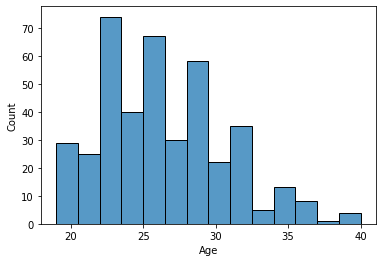

In [12]:
sns.histplot(data=stats_salary, x="Age")

### Age

Kebanyakan pemain berumur di kisaran 20-an karena pada 20 awal atau 19 tahun biasanya pemain di draft ke NBA (masuk dengan cara di draft), dan pada umur 20-an akhir biasanya pemain mencapai puncak atau "prime" dari kemampuan mereka. Pemain biasanya mencetak statistik terbaik atau performa terbaik mereka pada saat umur-umur prima ini.

In [13]:
corr_matrix = stats_salary[['salary17_18','Pos','MPG','PPG','APG','RPG','TOPG',
                           'BPG','SPG','Age','PER']].corr()
print(corr_matrix["salary17_18"].sort_values(ascending=False))

salary17_18    1.000000
PPG            0.708282
MPG            0.675666
TOPG           0.591155
RPG            0.556520
PER            0.548908
SPG            0.515406
APG            0.492047
BPG            0.335030
Age            0.234489
Name: salary17_18, dtype: float64


<AxesSubplot:>

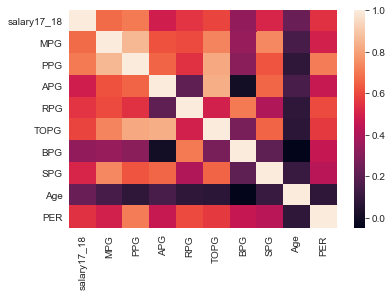

In [14]:
sns.set_style("white")
heat_salary= stats_salary[['salary17_18','Pos','MPG','PPG','APG','RPG','TOPG',
                           'BPG','SPG','Age','PER']]
dfData = heat_salary.corr() 
sns.heatmap(dfData)


## Correlation

Jadi disini tingkat korelasinya:
PPG > MPG > TOPG > RPG > PER > SPG > APG > BPG > Age

Point Per Game merupakan statistik yang paling penting di permainan basket (tim yang mencetak point paling banyak adalah tim yang menang) jadi sangat masuk akal untuk menjadi yang tertinggi. 

Kemudian diikuti oleh Minutes Per Game, dimana pemain yang bermain terbanyak biasanya merupakan pemain yang paling kuat di tim mereka (tidak selalu, tapi secara umum begitu). Ada exception kecil ketika sebuah tim memiliki banyak pemain yang baik di satu posisi, mungkin MPG pemain bisa berkurang walaupun secara logika mereka deserve minutes yang lebih tinggi. Minutes per game/played juga bisa menjadi representasi seberapa percaya pelatih terhadap pemain.

TOPG (Turnovers per Game) merupakan satu statisti yang memiliki korelasi relatif tinggi dengan salary. Dipandang dengan kasat mata mungkin ini merupakan sesuatu yang aneh karena secara logika turnover merupakan statistik negatif yang semakin tinggi artinya semakin buruk. Tapi setelah ditelusuri lebih lanjut ini masuk akal karena seperti yang saya jelaskan sebelumnya, pemain yang memegang bola paling banyak atau memiliki usage rate tertinggi adalah pemain-pemain yang memiliki turnover rate tertinggi juga. Dan secara logika, pemain yang memegang bola paling banyak biasanya merupakan pemain terbaik di suatu tim (lepas dari posisi point guard atau bukan, khususnya di permainan NBA modern).

Bahkan jika dilihat di ranking turnover, pemain-pemain yang terbaik di NBA (secara subjektif, karena hal seperti ini pasti ada unsur subjektifnya) dengan pemain-pemain yang memiliki turnover tertinggi sangat mirip. Jadi masuk akal kalau turnover per game memiliki korelasi positif dengan salary.

[Text(0.5, 0, 'Position'), Text(0, 0.5, 'Average Turnovers Per Game')]

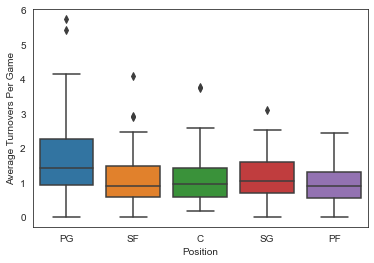

In [15]:
sns.boxplot(x="Pos", y="TOPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Turnovers Per Game')

### Turnovers per Game, based on Position

Turnover rate yang tertinggi dimiliki oleh posisi Point Guard, dan diiiuti oleh Shooting Guard. Di permainan basket klasik, seorang PG bertanggung jawab untuk menjadi primary ball handler dari tim tersebut (karena biasanya mereka yang memiliki skill ball handling dan passing terbaik), seperti yang sudah dikatakan, turnover dan usage rate memiliki korelasi positif. Karena semakin sering pemain memegang bola, semakin besar kemungkinan untuk dia melakukan kesalahan.

Tapi dengan evolusi permainan basket, semakin kesini semakin banyak pemain dari posisi SG, SF, PF atau bahkan C yang juga ikut menjadi ball handler. Ini bisa diihat di pemain-pemain seperti LeBron James, DeMarcus Cousins (yang pada 2017 kadang-kadang membawa bola menjadi play starter), atau bahkan pemain-pemain lainnya yang mungkin tidak sebagus dua contoh tersebut. Ini menyebabkan tingkat turnover dari posisi' lain juga semakin mendekati PG. Tapi kebanyakan tim masih menjadikan PG mereka sebagai primary ball handler, jadi selama itu masih terjadi, PG pasti akan memiliki turnover rate yang tinggi, atau paling tinggi.

[Text(0.5, 0, 'Position'), Text(0, 0.5, 'Average Blocks Per Game')]

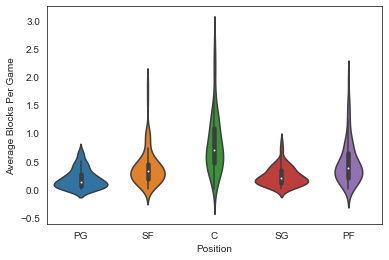

In [16]:
sns.violinplot(x="Pos", y="BPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Blocks Per Game')

### Blocks based on position

Block merupakan statistik positif yang dicetak ketika seorang pemain melakukan tepisan secara legal (tidak foul) untuk me-reject sebuah shot attempt dari pemain musuh.

Di permainan basket biasanya (ada beberapa exception seperti Ben Simmons dan Magic Johnson yang merupakan PG tapi sangat tinggi) urutan dari pemain terpendek ke tertinggi adalah PG->SG->SF->PF->C. Secara logis, seorang pemain yang lebih tinggi memiliki kemungkinan yang lebih besar untuk melakukan block terhadap musuh, jadi disini ditunjukan bahwa Center memiliki block per game tertinggi, diikuti oleh PF, SF, SG, lalu PG, sesuai dengan asumsi tinggi pemain.

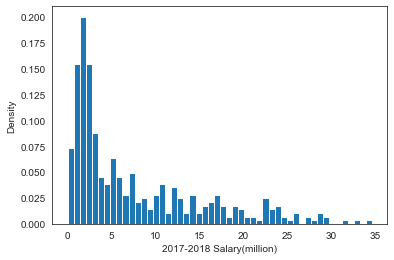

In [17]:
plt.hist(stats_salary['salary17_18'],density=True,bins=50)
plt.xlabel('2017-2018 Salary(million)')
plt.ylabel('Density')
plt.show()

### Salary Distribution

Kebanyakan salary pemain berada di kisaran 0.8-5 juta USD. Ini bisa dijelaskan oleh adanya minimum salary dan rookie-scale contract di NBA. Kebanyakan pemain memiliki kontrak dengan salary minimum, atau dengan rookie-scale salary.

Minimum salary ditentukan oleh years of experience di NBA, minimal 800k USD sampai sekitar 2jt untuk pemain veteran dengan 10+ tahun experience. Untuk rookie (pemain tahun pertama, yang masuk lewat NBA Draft), ditentukan oleh posisi draftnya.

<div align = center><img src="https://i.imgur.com/zWnQ57G.png" width = 35% height = 35%></div>
<div align = center>Breakdown minimum salary pada tahun 2017</div>

<div align = center><img src="https://cdn.hoopsrumors.com/files/2017/05/100-percent.jpg" width = 35% height = 35%></div>
<div align = center>Breakdown minimum salary pada tahun 2017-2020</div>



In [18]:
from sklearn.preprocessing import Normalizer

In [19]:
stats_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 164 to 379
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         411 non-null    float64
 1   Player       411 non-null    object 
 2   Pos          411 non-null    object 
 3   Age          411 non-null    float64
 4   G            411 non-null    float64
 5   PER          411 non-null    float64
 6   MPG          411 non-null    float64
 7   PPG          411 non-null    float64
 8   APG          411 non-null    float64
 9   RPG          411 non-null    float64
 10  TOPG         411 non-null    float64
 11  BPG          411 non-null    float64
 12  SPG          411 non-null    float64
 13  salary17_18  411 non-null    float64
dtypes: float64(12), object(2)
memory usage: 68.2+ KB


In [20]:
pd.get_dummies(stats_salary["Pos"], prefix="Pos") 
# karena sebelumnya bentuk value position adalah string, saya gunakan function dari pandas yaitu get_dummies untuk membuat 5 kolom baru untuk semua posisi pemain.

,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
164,0,0,1,0,0
418,0,0,1,0,0
410,0,0,1,0,0
204,0,0,0,1,0
121,1,0,0,0,0
...,...,...,...,...,...
200,0,0,1,0,0
143,0,0,0,0,1
191,0,1,0,0,0
391,0,0,0,1,0


In [21]:
def convert_dummy(df, feature,rank=0): 
    pos = pd.get_dummies(df[feature], prefix=feature)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [22]:
stats_salary = convert_dummy(stats_salary,'Pos')

In [23]:
stats_salary = stats_salary.dropna()
Y = stats_salary['salary17_18'] # target = salary
X = stats_salary.drop(['salary17_18','Year', 'Player'],axis=1) # drop target, year, karena hanya 2017 saja, dan player name karena tidak relevan

In [24]:
X.columns

Index(['Age', 'G', 'PER', 'MPG', 'PPG', 'APG', 'RPG', 'TOPG', 'BPG', 'SPG',
       'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG'],
      dtype='object')

In [25]:
from sklearn.preprocessing import MaxAbsScaler
# normalize feature' menggunakan sklearn
transformer = MaxAbsScaler().fit(X)
newX = transformer.transform(X)
newX = pd.DataFrame(newX,columns = X.columns)

In [26]:
X.head().round(4)

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
164,27.0,81.0,27.3,36.3827,29.0864,11.1852,8.1358,5.7284,0.4568,1.4815,0,0,1,0,0
418,28.0,81.0,30.6,34.5926,31.5802,10.3704,10.6667,5.4074,0.3827,1.6420,0,0,1,0,0
410,26.0,78.0,23.2,36.3590,23.1410,10.6538,4.1795,4.1410,0.6282,2.0128,0,0,1,0,0
204,32.0,74.0,27.0,37.7568,26.4054,8.7297,8.6486,4.0946,0.5946,1.2432,0,0,0,1,0
121,22.0,31.0,24.1,25.3548,20.2258,2.1290,7.8387,3.7742,2.4516,0.8710,1,0,0,0,0


In [27]:
newX.head().round(4) # data setelah di scale

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,0.675,0.9878,0.8864,0.9636,0.9210,1.0000,0.5758,1.0000,0.1729,0.7311,0.0,0.0,1.0,0.0,0.0
1,0.700,0.9878,0.9935,0.9162,1.0000,0.9272,0.7549,0.9440,0.1449,0.8103,0.0,0.0,1.0,0.0,0.0
2,0.650,0.9512,0.7532,0.9630,0.7328,0.9525,0.2958,0.7229,0.2378,0.9933,0.0,0.0,1.0,0.0,0.0
3,0.800,0.9024,0.8766,1.0000,0.8361,0.7805,0.6121,0.7148,0.2251,0.6135,0.0,0.0,0.0,1.0,0.0
4,0.550,0.3780,0.7825,0.6715,0.6405,0.1903,0.5548,0.6589,0.9279,0.4298,1.0,0.0,0.0,0.0,0.0


In [28]:
newX.describe().round(3)

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
count,411.000,411.000,411.000,411.000,411.000,411.000,411.000,411.000,411.000,411.000,411.000,411.000,411.000,411.000,411.000
mean,0.654,0.717,0.446,0.572,0.295,0.179,0.274,0.209,0.161,0.339,0.209,0.185,0.202,0.195,0.209
std,0.107,0.266,0.166,0.227,0.193,0.163,0.174,0.139,0.156,0.200,0.407,0.389,0.402,0.396,0.407
min,0.475,0.024,-0.068,0.069,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.575,0.561,0.338,0.412,0.162,0.073,0.152,0.112,0.058,0.204,0.000,0.000,0.000,0.000,0.000
50%,0.650,0.805,0.425,0.567,0.247,0.126,0.231,0.177,0.119,0.305,0.000,0.000,0.000,0.000,0.000
75%,0.725,0.927,0.534,0.763,0.400,0.232,0.359,0.277,0.194,0.450,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [29]:
# lakukan train_test_split untuk data yang sudah di scale dan belum discale
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 
x_train_NEW, x_test_NEW, y_train_NEW, y_test_NEW = train_test_split(newX, Y, test_size = 0.3) 

In [30]:
print('', x_train.shape, x_test.shape, y_train.shape, y_test.shape)

 (287, 15) (124, 15) (287,) (124,)


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
# RegEvaluation menampikan metric RMSE dan R2 Score dari model clf dan juga untuk menampilkan salary yang diprediksi dan kenyataannya.
def RegEvaluation(model, ytest, xtest, nameindex, yname,totaldt, predict=True):
    ypred = model.predict(xtest)
    xtest['Pred_Y'] = model.predict(xtest)
    dt = pd.merge(totaldt,xtest,how = 'right')
    xtest.drop(['Pred_Y'],axis=1,inplace=True)
    dt = dt[[nameindex, yname,'Pred_Y']]
    dt.sort_values(by = yname, ascending = False,inplace=True)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred)
    print('RMSE is', rmse)
    print('R sequared is', r2)
    if predict:
        return dt.head(20)

In [32]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=4, criterion="mse") 
dtree = clf.fit(x_train, y_train)

RegEvaluation(dtree, y_test, x_test, 'Player', 'salary17_18',stats_salary)

RMSE is 5.341763610653223
R sequared is 0.4208561930630912


,Player,salary17_18,Pred_Y
90,Carmelo Anthony,26.243760,21.913675
59,Damian Lillard,26.153057,27.075737
79,Otto Porter,24.773250,21.913675
0,Hassan Whiteside,23.775506,27.075737
110,Chandler Parsons,23.112004,3.662740
34,J.J. Redick,23.000000,7.977590
74,Kevin Love,22.642350,21.079170
80,LaMarcus Aldridge,21.461010,21.913675
123,Victor Oladipo,21.000000,13.030925
83,Serge Ibaka,20.061729,13.030925


In [33]:
dtree = clf.fit(x_train_NEW, y_train_NEW)
RegEvaluation(dtree, y_test_NEW, x_test_NEW, 
              'Player', 'salary17_18',stats_salary,predict=False)

# data yang discale malah menyebabkan RMSE yang lebih buruk dan R2 yang beda sedikit.

RMSE is 4.648085637045002
R sequared is 0.6572480742426721


In [34]:
x_train

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
130,24.0,66.0,15.2,15.757576,4.787879,0.606061,4.712121,0.500000,0.242424,0.378788,1,0,0,0,0
237,21.0,47.0,14.6,37.212766,18.914894,2.957447,3.382979,1.808511,0.212766,0.872340,0,0,0,0,1
47,23.0,12.0,19.7,4.416667,1.833333,0.166667,1.416667,0.166667,0.166667,0.083333,0,1,0,0,0
376,26.0,18.0,9.6,20.055556,6.777778,3.277778,2.888889,1.444444,0.166667,0.277778,0,0,0,0,1
87,26.0,67.0,13.2,31.626866,12.895522,1.522388,6.507463,1.955224,1.029851,1.895522,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,26.0,75.0,19.1,28.840000,14.613333,2.773333,10.386667,1.560000,0.986667,1.026667,1,0,0,0,0
94,26.0,70.0,15.5,28.985714,12.828571,2.685714,2.542857,1.314286,0.100000,1.128571,0,0,1,0,0
318,34.0,63.0,13.0,25.190476,10.126984,4.523810,1.793651,1.412698,0.031746,0.523810,0,0,1,0,0
297,24.0,40.0,10.7,8.650000,2.500000,0.850000,0.750000,0.375000,0.125000,0.525000,0,0,1,0,0
